In [11]:
from flask import Flask, render_template, Response
import cv2
import numpy as np

In [ ]:
app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

def gen():
    vc = cv2.VideoCapture(0)
    font = cv2.FONT_HERSHEY_SIMPLEX 
    while True:
        texval=''
        rval, frame = vc.read()
        zx=frame.shape
        frame=cv2.rectangle(frame,(int(zx[1]/4),int(zx[0]/4)),(int(zx[1]*(3/4)),int(zx[0]*(3/4))),(255,0,0),2)
        flag, encodedImage = cv2.imencode(".jpg",frame)
        yield (b'--frame\r\n'
                   b'Content-Type: image/jpeg\r\n\r\n' + bytearray(encodedImage) + b'\r\n')

       


@app.route('/video_feed')
def video_feed():
    return Response(gen(),
                    mimetype='multipart/x-mixed-replace; boundary=frame')

@app.route('/video_feed_static')
def video_feed_static():
    return render_template('Videoplayingtemp.html')


app.run(host='0.0.0.0')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Feb/2021 13:35:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Feb/2021 13:35:56] "GET /video_feed HTTP/1.1" 200 -


# bounding the box and making another model for object detection in this case human detection

In [7]:
image_BGR = cv2.imread(r'E:\cars\ts\ts\00001.jpg')


print('Image shape:', image_BGR.shape)  


h, w = image_BGR.shape[:2]


print('Image height={0} and width={1}'.format(h, w))  

Image shape: (800, 1360, 3)
Image height=800 and width=1360


In [8]:
with open(r'E:\cars\ts\ts\00001.txt') as f:

    lst = []
    for line in f:
        lst += [line.rstrip()]
        print(line)


for i in range(len(lst)):
   
    bb_current = lst[i].split()
    x_center, y_center = int(float(bb_current[1]) * w), int(float(bb_current[2]) * h)
    box_width, box_height = int(float(bb_current[3]) * w), int(float(bb_current[4]) * h)
    

    x_min = int(x_center - (box_width / 2))
    y_min = int(y_center - (box_height / 2))


    cv2.rectangle(image_BGR, (x_min, y_min), (x_min + box_width, y_min + box_height), [172 , 10, 127], 2)


    class_current = 'Class: {}'.format(bb_current[0])


    cv2.putText(image_BGR, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 0.7, [172 , 10, 127], 2)

2 0.7378676470588236 0.5125 0.030147058823529412 0.055

2 0.3044117647058823 0.65375 0.041176470588235294 0.0725

3 0.736764705882353 0.453125 0.04264705882352941 0.06875



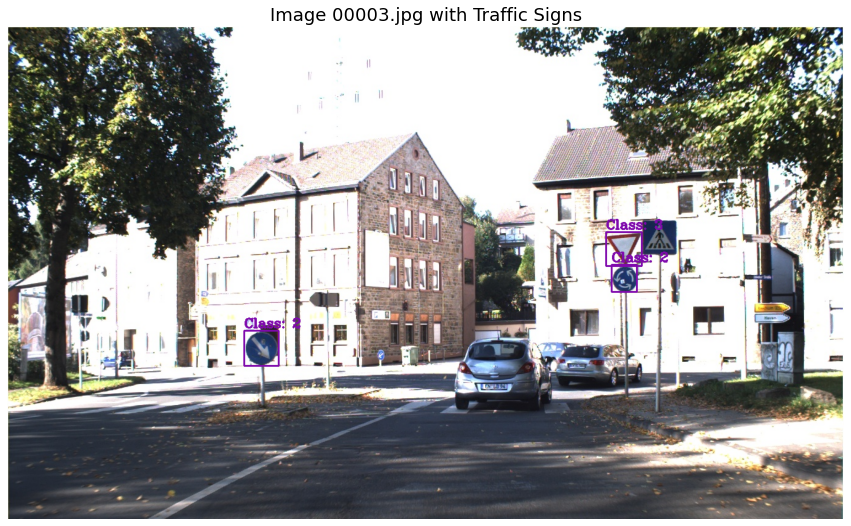

In [9]:
%matplotlib inline


plt.rcParams['figure.figsize'] = (15, 15)


fig = plt.figure()

plt.imshow(cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image 00003.jpg with Traffic Signs', fontsize=18)


plt.show()

# Saving the plot
fig.savefig('example.png')
plt.close()